# Simple Approach

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
path = "../Data/train.csv"
data = pd.read_csv(path)
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [85]:
data.dropna(inplace=True)

In [86]:
data.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
8418,8418,16412,16413,I'm watching the election results (9:43 pm eas...,Why were organizations formed during the Cold ...,0
208962,208962,1286,21693,How can I improve my spoken English ability?,How could I improve my English?,1
42977,42977,3595,14927,How do i lose weight?,How do I lose weight without quitting?,1
394324,394324,527206,527207,What is the hardest natural stone?,Is stone a renewable natural resource?,0
190097,190097,289073,289074,My male bestfriend gave up on me becas of a sm...,I recently had a serious misunderstanding with...,0
365019,365019,495115,495116,I'm reading a book and only have 150 pages lef...,I'm traveling to the US from the UAE and I hav...,0
194939,194939,295264,295265,Will Redmi 3s survive for 2yrs?,How could speed of light is same for two obser...,0
131136,131136,210327,210328,How do we come to a conclusion about what is b...,How do you come to a conclusion about something?,1
384766,384766,516836,368347,What everyone is doing for net neutrality?,What is net neutrality?,0
10051,10051,19509,19510,What is the use of electrical tape?,What is electrical tape? How is it used?,1


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [88]:
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='is_duplicate'>

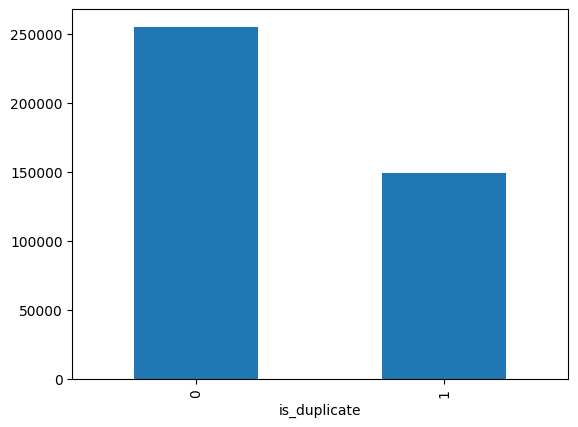

In [89]:
(data['is_duplicate'].value_counts()/data['is_duplicate'].count() )*100
data['is_duplicate'].value_counts().plot(kind='bar')

In [90]:
temp = pd.Series(list(data['qid1'])+ list(data['qid2']))
x = temp.value_counts() > 1
x[x].shape[0]

111778

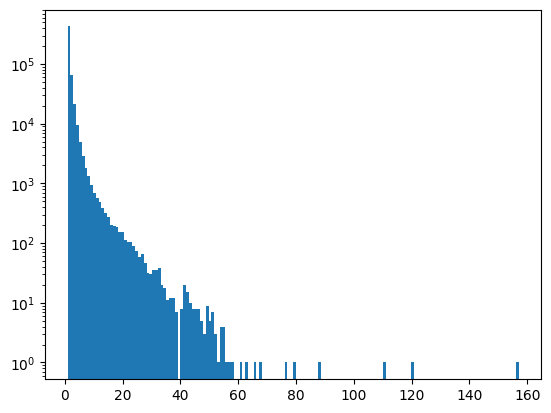

In [ ]:
plt.hist(temp.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [92]:
data2 = data.sample(40000)
X = data2[['question1','question2']]
y = data2['is_duplicate']

In [93]:
X = list(X.question1) + list(X.question2)

In [94]:
#
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)
q1_array , q2_array = np.vsplit(cv.fit_transform(X).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_array,index=data2.index)
temp_df2 = pd.DataFrame(q2_array,index=data2.index)
X = pd.concat([temp_df1,temp_df2],axis=1)

In [ ]:
X.info()
X = X.astype('int32')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 112821 to 330682
Columns: 6000 entries, 0 to 2999
dtypes: int64(6000)
memory usage: 1.8 GB
<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 112821 to 330682
Columns: 6000 entries, 0 to 2999
dtypes: int32(6000)
memory usage: 915.8 MB


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train = X_train.values.astype("float32")
X_test = X_test.values.astype("float32")

# y as int
y_train = y_train.values.astype("int32")
y_test = y_test.values.astype("int32")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.74375

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    predictor="auto",
    random_state=42
)

xgb.fit(X_train, y_train.astype("int32"))

d:\Projects\Duplicate_Question_Pair\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = xgb.predict(X_test)
accuracy_score(y_pred,y_test)

0.728375

# Another Approach

### Increase the features
1. question1 length
2. question2 length
3. no. of words in question1
4. no. of words in question2
5. no. of unique common words
6. no. of total unique words q1 + no. of total unique words q2

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "../Data/train.csv"
data = pd.read_csv(path)
data = data.sample(25000)


In [39]:
data.dropna(inplace=True)
temp = pd.Series(list(data['qid1'])+ list(data['qid2']))
x = temp.value_counts() > 1

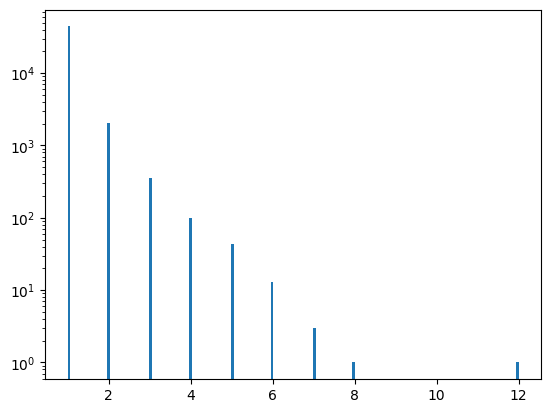

In [40]:
plt.hist(temp.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

X = data[['question1','question2','is_duplicate']]

In [41]:
X['q1_len'] = X['question1'].str.len()
X['q2_len'] = X['question2'].str.len()

C:\Users\sai\AppData\Local\Temp\ipykernel_8740\3678496880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['q1_len'] = X['question1'].str.len()
C:\Users\sai\AppData\Local\Temp\ipykernel_8740\3678496880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['q2_len'] = X['question2'].str.len()


In [42]:
X['q1_words_count'] = X['question1'].apply(lambda x:len(x.split()))
X['q2_words_count'] = X['question2'].apply(lambda x:len(x.split()))

In [43]:
# common unique words count
X['common_words_count'] = X.apply(
    lambda row: len(set(str(row['question1']).lower().split()) & set(str(row['question2']).lower().split())), 
    axis=1
)


In [44]:
# common unique words count
X['total_words_count'] = X.apply(
    lambda row: len(set(str(row['question1']).lower().split()) | set(str(row['question2']).lower().split())), 
    axis=1
)
X.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_words_count,q2_words_count,common_words_count,total_words_count
311067,What does it feel like to be a detective?,What is it like to be a detective?,1,41,34,9,8,7,10
356240,What advice would you tell to your 12-year-old...,Knowing what you know now; what would you tell...,0,85,69,16,12,5,20
327271,What are the best courses for the electrical a...,Which are the best companies for electrical an...,0,73,70,11,10,7,13
147784,What tasks did Hercules complete in the Disney...,Why did Disney stop putting songs in the anima...,0,61,79,10,15,4,19
4418,Is it appropriate to limit the right to educat...,FOR A 30 year OLD WORKING in A public sector B...,0,76,96,13,18,1,27


In [45]:
X['word_share'] = round(X['common_words_count'] / X['total_words_count'],2)

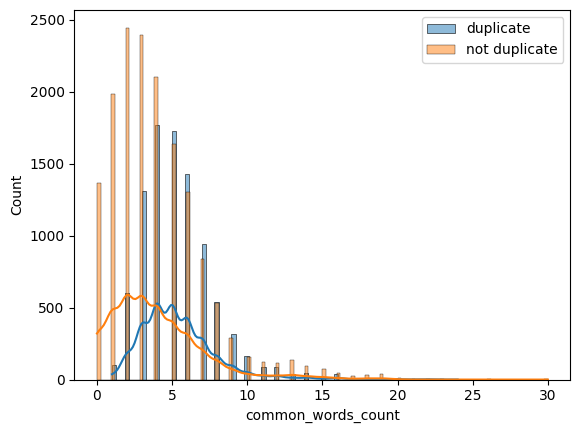

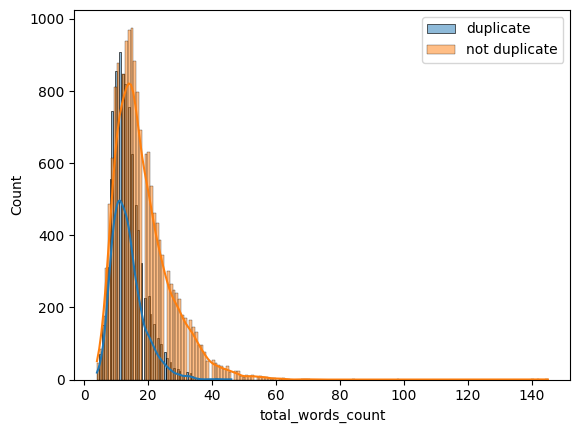

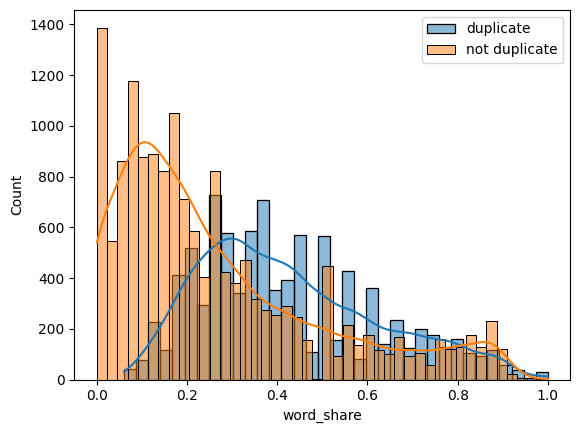

In [46]:
import seaborn as sns
sns.histplot(X[X['is_duplicate']==1]['common_words_count'], label="duplicate", kde=True)
sns.histplot(X[X['is_duplicate']==0]['common_words_count'], label="not duplicate", kde=True)
plt.legend()
plt.show()

sns.histplot(X[X['is_duplicate']==1]['total_words_count'], label="duplicate", kde=True)
sns.histplot(X[X['is_duplicate']==0]['total_words_count'], label="not duplicate", kde=True)
plt.legend()
plt.show()

sns.histplot(X[X['is_duplicate']==1]['word_share'], label="duplicate", kde=True)
sns.histplot(X[X['is_duplicate']==0]['word_share'], label="not duplicate", kde=True)
plt.legend()
plt.show()

In [47]:
X_ = X[['question1','question2']]
X = X.drop(columns=['question1','question2'])

In [48]:
questions = list(X_['question1']) + list(X_['question2'])    

In [49]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove symbols, punctuation, numbers (keep only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

question=[]

for q in questions:
    text = clean_text(q)
    question.append(text)


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=4000)
q1 ,q2 = np.vsplit(bow.fit_transform(question).toarray(),2)

In [51]:
q1 = pd.DataFrame(q1,index=X_.index)
q2 = pd.DataFrame(q2,index=X_.index)
q = pd.concat([q1,q2],axis=1)
q.head()

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
311067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356240,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
327271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X = pd.concat([X,q],axis=1)
y = X['is_duplicate']
X = X.drop(columns=['is_duplicate'])

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train = X_train.values.astype("float32")
X_test = X_test.values.astype("float32")

# y as int
y_train = y_train.values.astype("int32")
y_test = y_test.values.astype("int32")

In [54]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier()
xgb = XGBClassifier()

rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [55]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
print("RF : ",accuracy_score(y_pred,y_test))
y_pred = xgb.predict(X_test)
print("XGB : ",accuracy_score(y_pred,y_test))

RF :  0.7482
XGB :  0.7468


In [ ]:
RF = 0.7564
XGB = 0.7588